# Case Study 1: Clustering the Iris Dataset
## ECE 204 Data Science & Engineering 

In [2]:
import pandas as pd
df = pd.read_csv("iris.csv").iloc[:, :4]
df.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,petalLength,petalWidth,sepalLength,sepalWidth
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6


This dataset contains measurements for different types of flowers. Here are more detail on the measurements:

<img src="https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg" width="250" />

## Visualize data

Let's do the most basic level of investigation: looking at the data!

There are only 4 features for each flower measurement. Let's visualize all pairs between different features, i.e., plotting `petalLength` and `sepalLength` together with a scatter plot. If there's a clear relation between a pair of variables, this will make the relationship more clear.

It looks like there's at least two species of flowers in this dataset -- for example, look at `sepalWidth` against `petalWidth`:

<Axes: xlabel='sepalWidth', ylabel='petalWidth'>

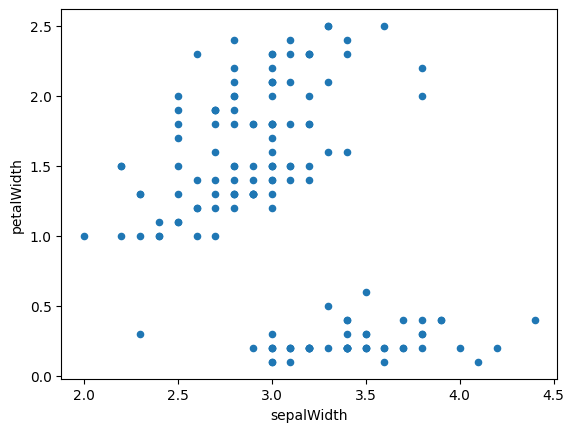

In [3]:
df.plot.scatter(x="sepalWidth", y="petalWidth")

That's a pretty clear separation.

However, the above plot visualizes one *pair* of variables. **What if 3 or 4 variables are important in determining the species?**

## Clustering

Let's consider the embedding: `[petalLength, petalWidth, sepalLength, sepalWidth]` and use K-Means to cluster the points (flowers) into different groups.

In [ ]:
from sklearn.cluster import KMeans

Scikit-Learn implements many machine learning algorithms. More details on KMeans specifically can be found in the user guide, which walks through some examples: https://scikit-learn.org/stable/modules/clustering.html#k-means

In [ ]:
km = KMeans(n_clusters=2)
km.fit(df)

Now compute the assignment of each datapoint its associated cluster

In [ ]:
y_hat = km.predict(df)
print(y_hat)

A shortcut: you can do the fitting and predicting in one shot using the "fit_predict" command:

In [ ]:
y_hat = km.fit_predict(df)

Let's visualize the results:

In [ ]:
ax = df.plot.scatter(x="sepalWidth", y="petalWidth", c=y_hat, cmap="viridis", colorbar=False)

We can inspect the location of each cluster centroid: 

In [ ]:
km.cluster_centers_

Let's try changing the number of clusters:

In [ ]:
km = KMeans(n_clusters=3)
y_hat = km.fit_predict(df)

In [ ]:
df.plot.scatter(x="sepalWidth", y="petalWidth", c=y_hat, cmap="viridis")

Let's try visualizing different pairs of variables, and see how they look:

In [ ]:
columns = ['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth']

for i in range(4):
    for j in range(i+1,4):
        df.plot.scatter(x=columns[i], y=columns[j], c=y_hat,
            cmap="viridis", colorbar=False, figsize=(3,3) )

Two of the classes are always mashed together. **Should `n_clusters` be 2 or 3?** It's hard to tell from inspecting these plots. We can say with certainty that there are *at least* two distinct clusters.

Luckily, we have more information from the underlying dataset, namely the species of each flower:

In [ ]:
df = pd.read_csv("iris.csv")
print(df.species.unique())
df.head()

Let's see how accurate `KMeans` performed the clustering -- does it group flowers of the same species together?

## How accurate is the clustering?
Here's the process to check this:

1. Re-run our `Kmeans` with 3 clusters
2. Match the *cluster* labels with the `species` labels
3. See whether the clusters 

### Re-running KMeans

In [ ]:
km = KMeans(n_clusters=3, random_state=42)

features = ['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth']
y_hat = km.fit_predict(df[features])

*Note:* Only the features are used, not the species.

The `random_state` keyword in `KMeans` removes some of the randomness in `KMeans` clustering. Specifying `random_state` as an integer is an easy way to get the same result each time.

### Matching clusters with species

Cluster labels are *numeric*:

In [ ]:
print(y_hat)

Let's figure out what the mapping should be by examining the data:

In [ ]:
# First, assign a column in the dataframe
df["assigned_cluster"] = y_hat

# now look at the clusters for each species:
df[ df.species == 'virginica' ]

It looks like "versicolor" = 0, "setosa" = 1, and "viriginica" = 2. Let's make an array that maps index to label:

In [ ]:
# create a list of the labels where the index corresponds to the cluster number.
label_mapping = ['versicolor', 'setosa', 'virginica']

def get_label(number):
    return label_mapping[number]

df["assigned_species"] = df.assigned_cluster.apply(get_label)
print(len(df))
df.head(100)

### Accuracy 

In [ ]:
def accuracy(actual, pred):
    return (actual == pred).sum() / len(actual)

accuracy(df.species, df.assigned_species)

Looks like the KMeans finds meaningful clusters!